# Проект по анализу данных

## Общая информация

Дата выдачи: 15.03.2016

Срок сдачи: 27.03.2016 09:00MSK

### О задании
В рамках курса "Интеллектуальный анализ данных" помимо выполнения контрольных и практических заданий вам также нужно выполнить проект. За каждый модуль ставится отдельная оценка. В этом модуле вам предстоит познакомиться с данными, сделать их описание, поискать закономерности. В следующем модуле вы продолжите работу с этими данными, но уже будете строить непосредственные модели, работающие с ними. 

Там, где требуется написать код, будет указано:
    
    ######################
    ### YOUR CODE HERE ###
    ######################

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Помимо кода вам также требуется написать развернутые ответы на вопросы.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить задание на указанных в ответном письме условиях.

Задание выполняется САМОСТОЯТЕЛЬНО. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий в открытом источнике, необходимо прислать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Если вы будете решать задание на виртуальной машине, учтите, что его могут видеть все. К тому же недоступность виртуальной машины не является уважительной причиной для продления дедлайна.

Обратите внимание, что на устном зачете в конце семестра некотоые вопросы могут быть связаны с проектом.

### Доп. баллы
В данном проекте вам будет предложено рассмотреть некоторые интересные закономерности в данных. Если вы обнаружите что-то интересное (например, в последнем пункте), либо у вас есть идеи как можно работать с данным датасетом — присылайте, это будет поощряться дополнительными баллами. Кроме того, вы можете выступить со своим личным исследованием на семинаре, это также не останется незамеченным.

### Формат сдачи
Для сдачи задания переименуйте получившийся файл *.ipynb в соответствии со следующим форматом: Username_(group)_Project.ipynb, где Username — ваша фамилия на латинице, group — название группы (например, Kozlova_IAD-11_Project.ipynb). Далее отправьте этот файл на используемую в Вашей группе почту курса (hse.minor.dm@gmail.com) c темой письма [ИАД-NN] - Проект - Фамилия Имя Отчество.

## Определение итоговой оценки студента

В качестве данных мы будем рассматривать два датасета, а именно предсказание оценки по португальскому языку или математике. С какими именно данными нужно будет работать вам можно узнать вызвав функцию *get_dataset_name*, на вход ей передав ваш адрес электронной почты.

In [1]:
def get_dataset_name(email):
    return 'student-mat.csv' if sum(ord(c) for c in email) % 2 else 'student-por.csv'

Выполните код ниже, передав на вход строку с адресом электронной почты:

In [2]:
get_dataset_name('sarahalesk2008@gmail.com')

'student-por.csv'

По набору и типу признаков эти даннык никак не отличаются, поэтому на все вопросы ниже вам нужно ответить в рамках вашего датасета.

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import pylab as plt

%matplotlib inline

Для начала загрузите данные. Обратите внимание, чтобы данные были загружены верно (был указан верный разделитель, а так же корректно отображались названия столбцов). Чтобы это проверить, а также посмотреть что представляют из себя данные, можно вывести первые несколько строк загруженного датасета на экран.

In [2]:
######################
df = pd.read_csv('student-por.csv', sep = ';')
######################

In [3]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,12,12,13


**(0.5 балла)** Задача 1. Что в данной задаче является объектом?

*- Студенты, изучающие португальский язык*

Как можно видеть, признаков много и они все разной природы. Вот более подробная расшифровка признаков:

 - school - тип школы ("GP" - Gabriel Pereira или "MS" - Mousinho da Silveira)
 - sex - пол ("F" - female или "M" - male)
 - age - возраст (от 15 до 22)
 - address - откуда студент ("U" - urban или "R" - rural)
 - famsize - размер семьи ("LE3" - меньше или равно 3 или "GT3" - больше 3)
 - Pstatus - в каких отношениях родители ("T" - живут вместе "A" - раздельно)
 - Medu - образование матери (0 - никакого,  1 - начальное образование (4 класса), 2 – от 5 до 9 классов, 3 – среднеспециальное или 4 – высшее)
 - Fedu - образование отца (0 - никакого,  1 - начальное образование (4 класса), 2 – от 5 до 9 классов, 3 – среднеспециальное или 4 – высшее)
 - Mjob - работа матери ("teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
 - Fjob - работа отца ("teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
 - reason - причина выбора школы (близко к дому — "home", репутация школы — "reputation", "course" предпочтение некоторым предметам или "other")
 - guardian - опекун ("mother", "father" или "other")
 - traveltime - время от дома до школы (1 - меньше 15 мин., 2 - 15 до 30 мин., 3 - 30 мин. до 1 часа, или 4 - больше 1 часа)
 - studytime - количество часов обучения в неделю (1 - меньше 2 часов, 2 - от 2 до 5 часов, 3 - от 5 до 10 часов, или 4 - больше 10 часов)
 - failures - колисечтво ранее не сданных предметов (n if 1 <= n < 3, else 4)
 - schoolsup - дополнительные занятия (yes or no)
 - famsup - помощь от семьи при выполнении заданий (yes or no)
 - paid - дополнительные платные занятия (yes or no)
 - activities - внеклассная деятельность (yes or no)
 - nursery - посещал детский сад (yes or no)
 - higher - желание высшего образования (yes or no)
 - internet - домашний интернет (yes or no)
 - romantic - состоит в романтических отношениях (yes or no)
 - famrel - насколько хорошо отношения в семье (от 1 - очень плохие до 5 - превосходные)
 - freetime - наличие свободного времени после школы (от 1 - очень мало до 5 - очень много)
 - goout - гуляет с друзьями (от 1 - редко до 5 - очень часто)
 - Dalc - употребление алкоголя в будние дни (от 1 - очень редко до 5 - очень часто)
 - Walc - употребление алкоголя в выходные (от 1 - очень редко до 5 - очень часто)
 - health - текущее состояние здоровья (от 1 - очень плохое до 5 - очень хорошее)
 - absences - количество школьных пропусков (от 0 до 93)

Признаки ниже связаны с курсом (математика/португальский)
 - G1 - оценка за первый семестр (от 0 до 20)
 - G2 - оценка за второй семестр (от 0 до 20)
 - [целевая переменная] G3 - итоговая оценка (от 0 до 20)

**(0.5 балла)** Задача 2. Какое количество признаков есть в данной задаче (целевая переменная не является признаком)?

In [10]:
######################
print(df.shape)
######################

(649, 33)


**Ответ**:
В данной задаче 32 признака. Количество строк - количество анализируемых объектов, т.е. студентов.
Количество столбцов - количество признаков. Целевая переменная (итоговая оценка по португальскому языку)  не является признаком.


**(1 балл)** Задача 3. Определите к какому из указанных ниже типов относится каждый признак:
 - бинарный:
 - числовой: 
 - категориальный: 
 - порядковый: 
 - множественный:

Если признаков некоторого типа нет, укажите это.

######################
- бинарный: school, sex, address, famsize, Pstatus, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic
- числовой: age, absences, G1, G2, G3
- категориальный: Mjob, Fjob, reason, guardian, failures, absences
- порядковый: Medu, Fedu, traveltime, studytime, famrel, freetime, goout, Dalc, Walc, health,
- множественный: нет

######################

**(0.5 балла)** Задача 4. Есть ли в данных пропуски? Если да, назовите какие признаки имеют пропуски и удалите все объекты с пропусками. 

In [9]:
print(df.shape)
df_1= df.dropna(how='any') #удаление объектов со значениями признаков NaN
print(df_1.shape)

(649, 33)
(649, 33)


Количество объектов не поменялось, следовательно, пропусков нет

**(1 балл)** Задача 5. Теперь посмотрите на целевую переменную. К какому типу задач относится данная? Поясните свой ответ.

**ОТВЕТ**:
Данная переменная относится к задачам регрессии. Несмотря на то, что максимальная оценка по португальскому языку 20, мы не можем поставить задачу классификации. Нам нужно построить универсальный алгоритм, предсказывающий оценки по португальскому на любой выборке на основе существующих признаков. Следовательно, перед нами стоит задача регрессии.

**(1 балл)** Задача 6. Постройте гистограмму значений целевой переменной с количеством бинов (bins) равным 20. Какое самое частое значение? Есть ли студенты, получисшие 0? 20? Постройте аналогичный гистограммы для признаков G1 и G2. Есть ли различие между ними и целевой переменной и в чем оно состоит?

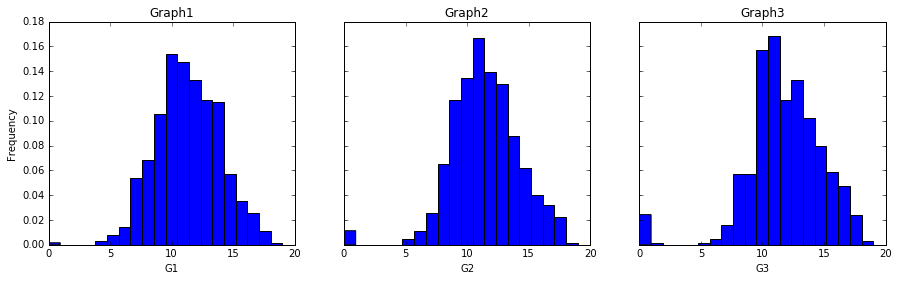

In [16]:
#####################
tPlot, axes = plt.subplots(
        nrows=1, ncols=3, sharex=False, sharey=True, 
        gridspec_kw={'height_ratios':[1,1,1]}, figsize=(15, 12)
        )
axes[0].set_title('Graph1')
axes[0].set_xlabel('G1')
axes[0].set_ylabel('Frequency')
axes[1].set_title('Graph2')
axes[1].set_xlabel('G2')
axes[2].set_title('Graph3')
axes[2].set_xlabel('G3')

hist_G1 = df['G1']
hist_G2 = df['G2']
hist_G3 = df['G3']

hist_G1.plot.hist(by=None, bins=20, ax=axes[0], normed=1)
hist_G2.plot.hist(by=None, bins=20, ax=axes[1], normed=1)
hist_G3.plot.hist(by=None, bins=20, ax=axes[2], normed=1)

plt.show()
######################

**Вопрос задачи:**
Какое самое частое значение (G1)? Есть ли студенты, получисшие 0? 20? Есть ли различие между ними (G2 и G3) и целевой переменной и в чем оно состоит?

**Ответ**:
Самая частая итоговая оценка, получаемая студентами по португальскому - 12 баллов. 
Есть студенты, которые получили 0 (чуть больше 2%). Студентов, получивших 20 баллов, нет.
Что касается оценок за первый и второй семестры, то самой частой оценкой в первом семестре было 10 баллов, а во втором - 11 баллов. Оценки распределены нормально, что соответствует принятым представлениям о распределении оценок.
Студентов, получивших 0 баллов во 2 семестре, было почти в 2,5 раза больше по сравнению с 1 семестром.

**(1 балл)** Задача 7. Посчитайте корреляцию Пирсона между целевой переменной и значениями G1 и G2. Можно ли сказать, что между ними есть линейная зависимость? Для вычисления корреляции Пирсона можно воспользоваться функцией [pearsonr](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html) из модуля scipy.stats или методом [corr](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) датафрейма.

In [7]:
from scipy import stats
corr_G3_G1 = stats.pearsonr(df['G3'], df['G1'])
print('Корреляция между итоговой оценкой по португальскому и оценкой за 1 семестр составила', corr_G3_G1[0])

Корреляция между итоговой оценкой по португальскому и оценкой за 1 семестр составила 0.826387124789


In [8]:
corr_G3_G2 = stats.pearsonr(df['G3'], df['G2'])
print('Корреляция между итоговой оценкой по португальскому и оценкой за 1 семестр составила', corr_G3_G2[0])

Корреляция между итоговой оценкой по португальскому и оценкой за 1 семестр составила 0.91854800356


**Вопрос задачи:** Можно ли сказать, что между ними есть линейная зависимость?

**Ответ:**
Коэффициент корреляции между итоговой оценкой по португальскому и оценкой за 1 семестр равен примерно 0.82, что является показателем наличия сильной линейной зависимости между переменными.
Тоже самое можно сказать и про связь между целевой переменной и оценкой за 2 семетр. Коэффициент корреляции равен 0.91.

**(0.5 балла)** Найдите самую частую причину выбора школы.

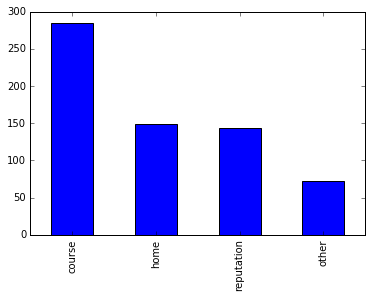

In [21]:
######################
import matplotlib.pyplot as plt
df['reason'].value_counts().plot(kind='bar')
plt.show()
######################

**Ответ:**
Самым частой причиной выбора школы является предпочтение некоторым предметам.

**(1 балл)** В данных есть несколько интересных признаков. Например, школа. Постройте на одной гистограмме распределение целевой переменной в зависимости от школы. Верно или нет, что у студенты одной школы имеют оценки выше, чем другой? Кроме того, интересно также узнать, сказывается ли причина выборка школы на оценках. Постройте аналогичную гистограмму для тех, у кого в поле причины указана самая частая причина (она должна быть найдена в предыдущем пункте) и всех остальных. Верно ли, что студентны, выбравшие данную школу по этой причине более успешны?

(Примеры как можно строить такие гистограммы можно посмотреть в материалах к семинарам или [здесь](http://matplotlib.org/examples/statistics/histogram_demo_multihist.html) и [здесь](http://stackoverflow.com/questions/6871201/plot-two-histograms-at-the-same-time-with-matplotlib)). 

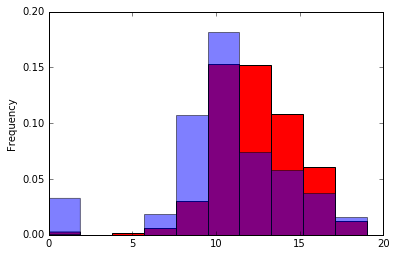

In [22]:
######################
df[df.school=='GP']['G3'].plot.hist(stacked=True, color='red', normed=1)
df[df.school=='MS']['G3'].plot.hist(stacked=True, normed=1, alpha=0.5)
plt.show()
######################

**Вопрос задачи**:
Верно или нет, что студенты одной школы имеют оценки выше, чем другой? Кроме того, интересно также узнать, сказывается ли причина выборка школы на оценках. Постройте аналогичную гистограмму для тех, у кого в поле причины указана самая частая причина (она должна быть найдена в предыдущем пункте) и всех остальных. Верно ли, что студентны, выбравшие данную школу по этой причине более успешны?

**Ответ**:
Из представленной гистограммы видно, что студенты школы Gabriel Pereira, в целом, учатся лучше, чем студенты школы Mousinho da Silveira. Несмотря на то, что количество студентов, получивших 5, 19 и 10-12 баллов не сильно различается между школами, по остальным оценкам (13, 15, 17-18) количество студентов GB примерно в 1,5 раза превышает количество студентов MS. Большинство студентов MS имеют оценки от 0 до 10. Это говорит о том, что успеваемость студентов GB выше, чем у студентов MS.

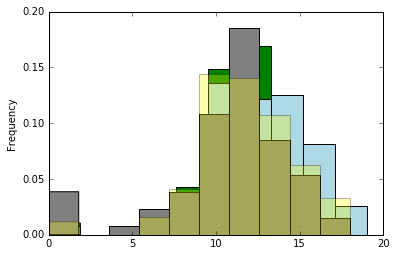

In [41]:
# Гистограмма зависимости целевой переменной от причины выбора школы
df[df.reason=='home']['G3'].plot.hist(stacked=True, color='green', normed=1)
df[df.reason=='reputation']['G3'].plot.hist(stacked=True, color='lightblue', normed=1)
df[df.reason=='other']['G3'].plot.hist(stacked=True, color='grey', normed=1)
df[df.reason=='course']['G3'].plot.hist(stacked=True, color='yellow', normed=1, alpha=0.3)
plt.show()

#df['reason'].value_counts().plot(kind='bar')
#plt.show()
######################

**Вопрос задачи:** 
Постройте аналогичную гистограмму для тех, у кого в поле причины указана самая частая причина (она должна быть найдена в предыдущем пункте) и всех остальных. Верно ли, что студентны, выбравшие данную школу по этой причине более успешны?

**Ответ**:
*Если считать успешными студентов, получивших итоговую оценку по португальскому от 15 и выше, то большая часть успешных студентов выбирали школу, исходя из ее репутации (голубые столбцы). Что касается студентов, выбравших школу по самой частой причине - предпочтению некоторым предметам (желтые столбцы), большинство из них получили по дисциплине оценку 10-13 из возможных 20. Из чего, следует вывод, что студенты, выбравшие школу по предпочтению предметам менее успешны, чем студенты, выбравшие школу по репутации, и более успешны, чем студенты, выбравшие школу, исходя из близости к дому и по другим причинам (other).*

**(0.5 балла)** Сделайте описание числовых признаков: какое среднее, медиана, дисперсия, минимальное и максимальное значение. Для всех ли признаков эти величины имеют смысл? Если нашлись такие признаки, то поясните почему.

In [43]:
###################### 
#Числовыми признаками являются возраст, количество пропусков и оценки по португальскому языку.
age = df['age'] 
min_age = age.min()
max_age = age.max()
mean_age = age.mean()
median_age = age.median()
var_age = age.var()

print('min_age = ', min_age)
print('max_age = ', max_age)
print('mean_age = ', mean_age)
print('median_age = ', median_age)
print('var_age = ', var_age)

######################

min_age =  15
max_age =  22
mean_age =  16.7442218798151
median_age =  17.0
var_age =  1.483859308718057


In [44]:
######################
#Статистика по количеству пропусков
absent = df['absences'] 
min_absent = absent.min()
max_absent = absent.max()
mean_absent = absent.mean()
median_absent = absent.median()
var_absent = absent.var()

print('min_absent = ', min_absent)
print('max_absent = ', max_absent)
print('mean_absent = ', mean_absent)
print('median_absent = ', median_absent)
print('var_absent = ', var_absent)
######################

min_absent =  0
max_absent =  32
mean_absent =  3.6594761171032357
median_absent =  2.0
var_absent =  21.53664231771551


In [54]:
######################
#Статистика по оценкам по португальскому языку за первый семестр
G1_new = df.G1
min_G1_new = G1_new.min()
max_G1_new = G1_new.max()
mean_G1_new = G1_new.mean()
median_G1_new = G1_new.median()
var_G1_new = G1_new.var()

import pprint
ds1 = dict(min_G1 = G1_new.min(), max_G1 = G1_new.max(), mean_G1 = G1_new.mean(), 
          median_G1 = G1_new.median(), var_G1 = G1_new.var())
pprint.pprint(ds1, width =20)

#Статистика по оценкам по португальскому языку за второй семестр
G2_new = df.G2
min_G2_new = G2_new.min()
max_G2_new = G2_new.max()
mean_G2_new = G2_new.mean()
median_G2_new = G2_new.median()
var_G2_new = G2_new.var()

ds2 = dict(min_G2 = G2_new.min(), max_G2 = G2_new.max(), mean_G2 = G2_new.mean(), 
          median_G2 = G2_new.median(), var_G2 = G2_new.var())
pprint.pprint(ds2, width =20)

#Статистика по итоговой оценке по португальскому языку
G3_new = df.G3
min_G3_new = G3_new.min()
max_G3_new = G3_new.max()
mean_G3_new = G3_new.mean()
median_G3_new = G3_new.median()
var_G3_new = G3_new.var()

ds3 = dict(min_G3 = G3_new.min(), max_G3 = G3_new.max(), mean_G3 = G3_new.mean(), 
          median_G3 = G3_new.median(), var_G3 = G3_new.var())

pprint.pprint(ds3, width =20)

######################

{'max_G1': 19,
 'mean_G1': 11.399075500770415,
 'median_G1': 11.0,
 'min_G1': 0,
 'var_G1': 7.536480625463658}
{'max_G2': 19,
 'mean_G2': 11.570107858243452,
 'median_G2': 11.0,
 'min_G2': 0,
 'var_G2': 8.489290266126428}
{'max_G3': 19,
 'mean_G3': 11.906009244992296,
 'median_G3': 12.0,
 'min_G3': 0,
 'var_G3': 10.437139759173656}


**Ответ**:
Для всех признаков эти величины имеют смысл. В задаче регрессии нам понадобится дисперсия и среднее значение признаков, например, при масшабировании признаков и расчете средней ошибки. Значение максимумов и минимумов нам может понадобится при расчете разброса оценок, пропусков или возраста.

**(0.75 балла)** Верно ли, что студенты имеющие больше 10 пропусков учатся хуже, чем все остальные? На этот вопрос вы можете ответить, посмотрев на данные любым удобным для вас способом (например, аналогично предыдущим пунктам, либо сравнив средние оценки и т.д.). 

In [91]:
######################
bad_stud = df[df['absences'] > 10] 
good_stud = df[df['absences'] < 10]
print(bad_stud["G3"].mean())
print(good_stud["G3"].mean())
######################


10.653061224489797
12.0


**Ответ:**
Средняя итоговая оценка студентов, пропустивших более 10 занятий, ниже оценки остальных студентов на 2 балла, поэтому мы можем говорить о том, что они хуже учатся.

**(0.75 балла)** Верно ли, что студенты желающие получить высшее образование учатся лучше, чем все остальные? 

In [9]:
######################
higher_yes_g3_mean = df[df['higher'] == 'yes']['G3'].mean()
higher_no_g3_mean = df[df['higher'] == 'no']['G3'].mean()
print higher_yes_g3_mean, higher_no_g3_mean
######################

12.275862069 8.79710144928


**Ответ**:
Студенты, желающие получить высшее образование, учатся лучше, т.к. их средний балл = 12.27, тогда как средняя оценка остальных студентов примерно равна 8.8

**(1 балл)** Выберете признаки из не рассмотренных ранее. Какие на ваш взгляд влияют на итоговую оценку? Попробуйте найти закономерности, аналогичные рассмотренным ("студенты желающие получить высшее образование учатся лучше, чем все остальные").

In [76]:
######################
#1) Зависимость итоговой оценки от наличия высшего образования у обоих родителей
a = df.Medu == 4
b = df.Fedu == 4
a == b
c = a==b
print ('parents_education= ', df.G3.corr(c))

#2) Зависимость итоговой оценки от наличия дополнительных платных занатий
corr_2= df.paid.replace(to_replace=('yes', 'no'), value=(1, 0)).corr(df['G3'])
print ('extrapaid_G3= ', corr_2)

#3) Зависимость итоговой оценки от помощи от семьи при выполнении заданий
corr_3= df.famsup.replace(to_replace=('yes', 'no'), value=(1, 0)).corr(df['G3'])
print ('famsup_G3= ', corr_3)

#4) Зависимость итоговой оценки от помощи от редкой возможности гулять с друзьями
gt = df.goout == 1
print ('go_out= ', df.G3.corr(gt))

#5) Зависимость итоговой оценки от места, откуда студент
corr_4 = df.address.replace(to_replace=('U', 'R'), value=(1, 0)).corr(df['G3'])
print ('city_village= ', corr_4)

#6) Зависимость итоговой оценки от наличия интернета дома
corr_5 = df.internet.replace(to_replace=('yes', 'no'), value=(1, 0)).corr(df['G3'])
print ('internet_at_home= ', corr_5)

#7) Зависимость итоговой оценки от очень хорошего состояния здоровья
hlt = df.health == 5
print ('good_health= ', df.G3.corr(hlt))
######################

parents_education=  -0.130427770696
extrapaid_G3=  -0.0548979078233
famsup_G3=  0.0592055555458
go_out=  -0.103025765836
city_village=  0.16763734859
internet_at_home=  0.150024853851
good_health=  -0.106593190959


**Ответ**:
Как видно получилось большое количество отрицательных значений из получившихся значений корреляций, однако эти значения слишком малы, чтобы говорить о наличии какой-либо взаимосвязи между расмотренными переменными. Я бы предложила рассмотреть взаимосвязь не просто желания получить высшее образование и успеваемости, а университетов, в которые хотят поступить школьники. Другими словами, взаимосвязь положения университета, в который хочет поступить школьник, в общем рейтинге университетов в стране. Мне кажется логичным, что обнаружится сильная взаимосвязь между хорошей успеваемостью и выского положения университета в рейтинге. Но, к сожалению, мы не обладаем достаточного количества данных для этого исследования. Что касается существующих данных, то, отсутствие сильной корреляции среди рассмотренных пар признаков, возможно, говорит о том, что необходимо рассмотреть совокупность признаков.  

